
---

### Analysis

- This dataframe consists of 249 unique mouse IDs which have been given 6 types of drugs to see their effect on tumor volume.
- 49% of the data consists of female mouse and 50% of data consists of male mouse.
- The highest number of observations have been calculated for Capumulin drug and least observations for Proprivia drug.
- There is a strong correltaion (0.84) between tumor volume and mouse weight. As weigh increases, it is likely that tumor       
  volume   also increases.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
#pd.set_option('display.max_rows', 100)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
mice_num = len(df['Mouse ID'].unique())
mice_num

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice = df[df.duplicated()][['Mouse ID','Timepoint']]
print(duplicated_mice)

    Mouse ID  Timepoint
861     g989          0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID']== 'g989',:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#new= df.drop_duplicates(subset=['Mouse ID','Timepoint']) (this will just drop duplicates but keep single occurences)

#dropping duplicated data entirely
new = df[df['Mouse ID'].isin(['g989'])==False]  
new


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(new['Mouse ID'].unique())

248

In [8]:
#in order to check if duplicated data has been removed
#new.loc[new['Mouse ID']== 'g989',:]

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean = new.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = new.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var = new.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

std = new.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = new.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
summary =  pd.DataFrame({'mean tumor volume': mean, 'median tumor volume':median, 'tumor volume var':var, 'tumor volme std ':std, 'tumor volume sem':sem})
summary


,mean tumor volume,median tumor volume,tumor volume var,tumor volme std,tumor volume sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
new.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': ['mean','median','var', 'std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

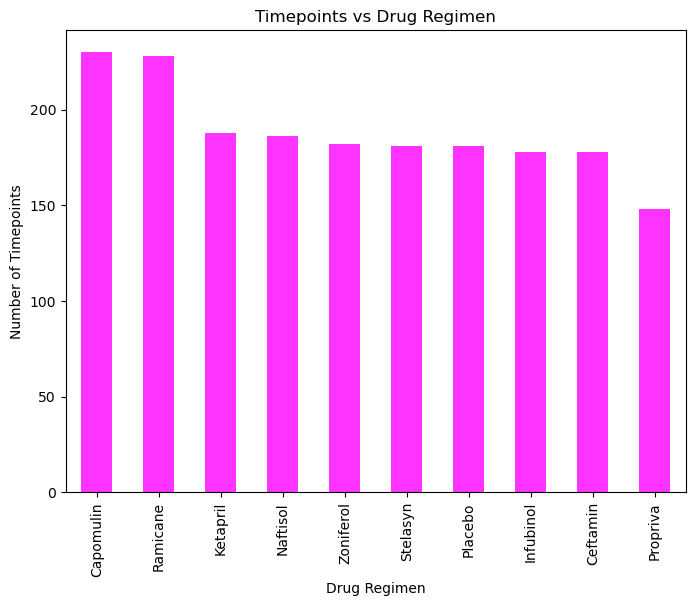

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

#first groupby 'Drug Regimen' and then use .count() method to count the no.of observations/timepoints rather than adding them
# we don't want to add the time but just count observations
#instead of .count( use value_counts()as it sort out values)
counts = new['Drug Regimen'].value_counts()

figure1 = counts.plot(kind="bar", facecolor="fuchsia", figsize=(8,6),
                                 title="Timepoints vs Drug Regimen",
                                 xlabel="Drug Regimen",
                                 ylabel="Number of Timepoints",alpha = 0.8)

# Show plot
plt.show()


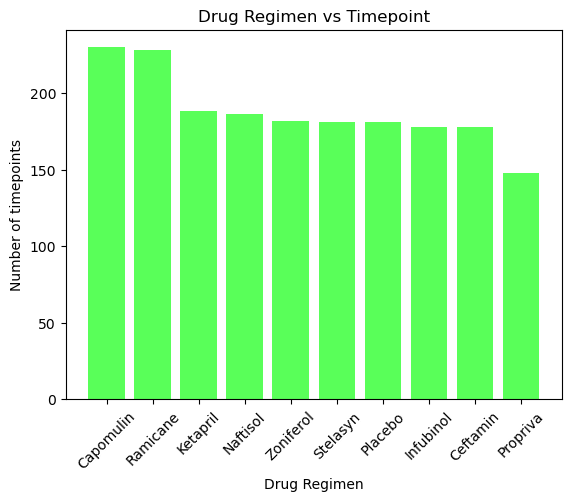

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = new['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values, facecolor="lime", alpha=0.65, align="center")
plt.title("Drug Regimen vs Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")

plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Sex')

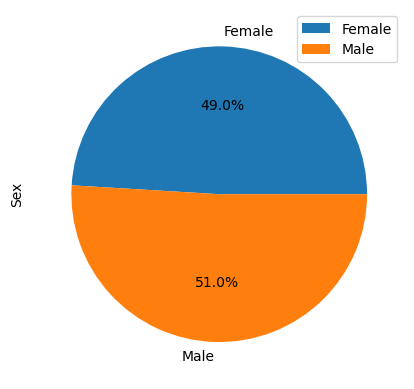

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#(new['Sex']== 'Female').sum()
y = new['Sex']
Female= y[y=='Female'].count()
Male = y[y=='Male'].count()

Sex = ['Male', 'Female']
Count = [Male, Female]

df = pd.DataFrame({'Sex':Sex, 'Count': Count })
sex_pie = df.groupby(['Sex']).sum().plot(kind='pie', y='Count',autopct = "%1.1f%%")
sex_pie.set_ylabel("Sex")


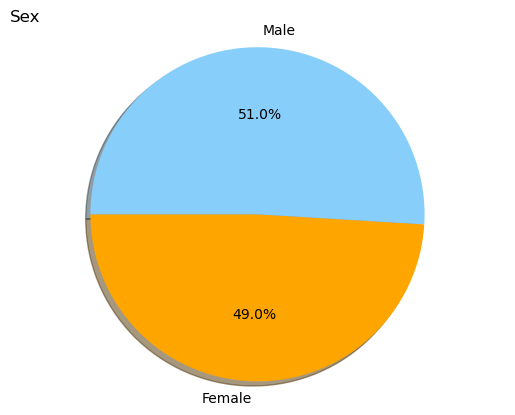

In [14]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot


# The values of each section of the pie chart
sizes = [Female, Male]
labels = ["Female",'Male']
# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]



plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# print the final product to the screen
plt.title('Sex', loc= 'left')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = new.groupby(['Mouse ID']).max()['Timepoint']
# reset index so that it is no longer stored to Mouse ID  but should be numbers
greatest_tp= greatest_tp.reset_index() 


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = greatest_tp.merge(new, on = ['Mouse ID', 'Timepoint'], how='left')
merged_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


treatment_list = ['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol = merged_df.loc[merged_df['Drug Regimen']== drug, 'Tumor Volume (mm3)' ]
    #print(final_vol)
    
    # add subset 
    tumor_vol_list.append(final_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound)  |  (final_vol> upper_bound)] 
    print(f'{drug} {outliers}')

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


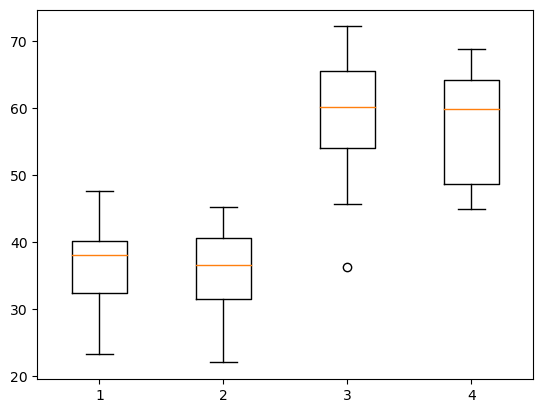

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

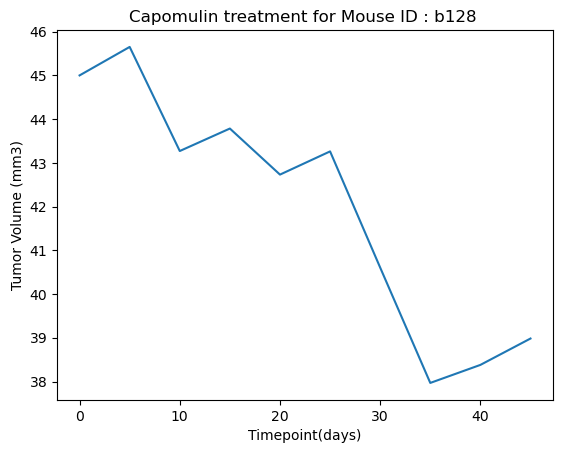

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = new.loc[(new['Drug Regimen']=='Capomulin')& (new['Mouse ID']=='b128'),:]

plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatment for Mouse ID : b128 ')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

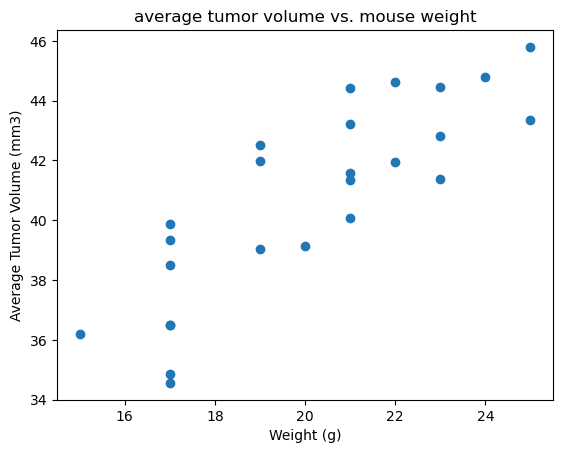

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = new.loc[new['Drug Regimen'] == "Capomulin"]

# this will give the mean values for each mouse ID
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean() 
avg_tumor = capomulin_average['Tumor Volume (mm3)'] # average tumor volume


avg_weight = capomulin_average['Weight (g)'] # average tumor volume
avg_weight


plt.scatter(avg_weight, avg_tumor)
plt.title('average tumor volume vs. mouse weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

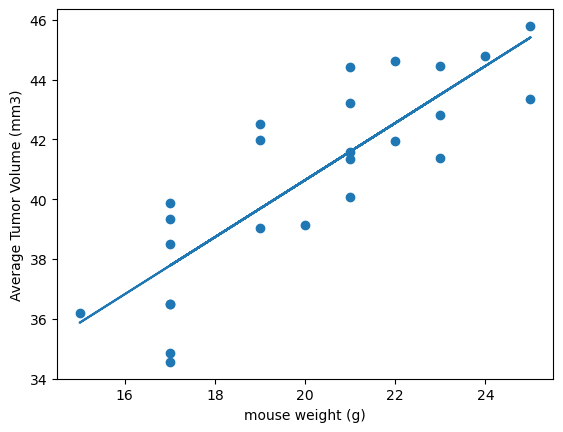

The correlation coefficient between mouse weight and average tumor volume  is 0.84


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values =avg_weight 
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('mouse weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume  is {round(st.pearsonr(avg_weight,avg_tumor)[0],2)}")
